### Parâmetros
  
  - Media
  - Mediana
  - Moda
  - Desvio Padrão

### Estatística descritiva

  - Parâmetros
  - Simetria
  - Quartis, decis, percentis
  - Máximo e Mínimo
  - Outliers (valores fora curva)


In [1]:
import os, sys, math
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats

from statistics import mode

import matplotlib.pyplot as plt # matplotlib e seu alias plt
# %matplotlib inline

## Revendo

### Gráfico de Frequências Uniforme

- uniforme, logo simétrico

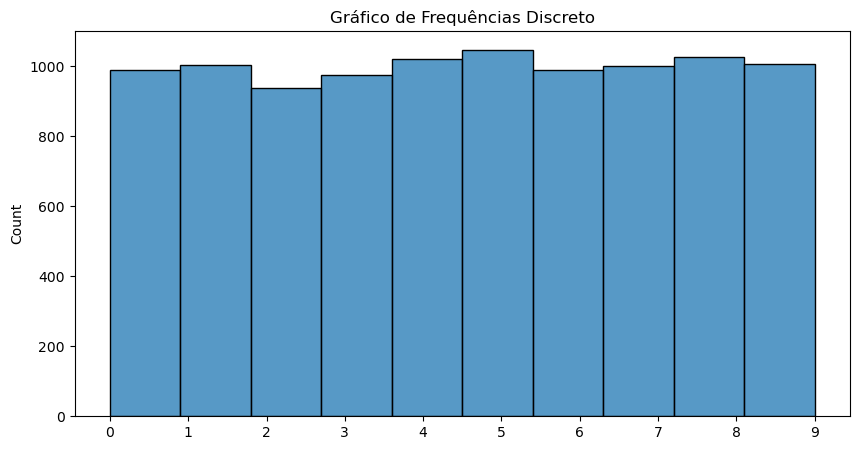

In [2]:
N = 10000
divs = 10
nums = np.random.randint(0, divs, N)

fig = plt.figure(figsize=(10,5))
ax = sns.histplot(nums, bins=divs, kde=False)
ax.set_title("Gráfico de Frequências Discreto")
ax.set_xticks(np.arange(0, divs));

In [3]:
# Parâmetros
mini = np.min(nums)
maxi = np.max(nums)
mediana = np.median(nums)
media   = np.mean(nums)
SSD     = np.std(nums)
moda    = mode(nums)

f"mini, max = [{mini}-{maxi}], media = {media:.2f} ({SSD:.2f}) mediana = {mediana:.2f} e moda = {moda:.2f}"

'mini, max = [0-9], media = 4.54 (2.87) mediana = 5.00 e moda = 5.00'

### Gráfico de Frequências uniforme - 40 bins

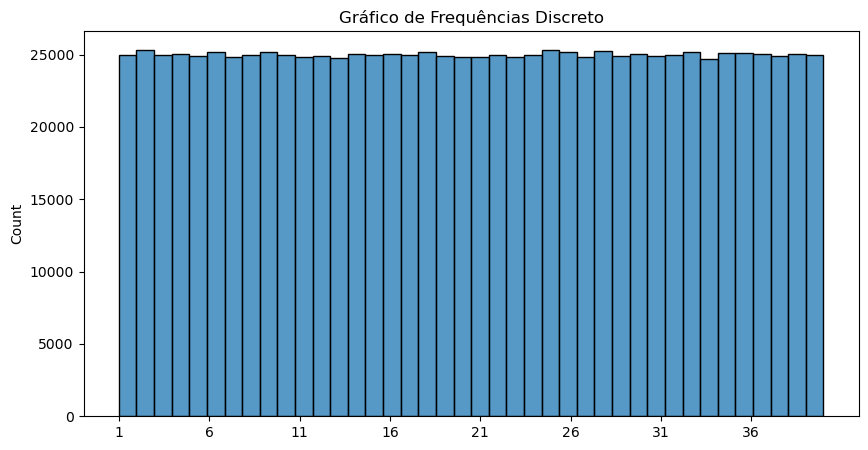

In [4]:
N = 1000000
divs = 40
nums = np.random.randint(1, divs+1, N)

fig = plt.figure(figsize=(10,5))
ax = sns.histplot(nums, bins=divs, kde=False)
ax.set_title("Gráfico de Frequências Discreto")
ax.set_xticks(np.arange(1, divs+1, step=5));

In [5]:
# Parâmetros
mini = np.min(nums)
maxi = np.max(nums)
mediana = np.median(nums)
media   = np.mean(nums)
SSD     = np.std(nums)
moda    = mode(nums)

f"mini, max = [{mini}-{maxi}], media = {media:.2f} ({SSD:.2f}) mediana = {mediana:.2f} e moda = {moda:.2f}"

'mini, max = [1-40], media = 20.50 (11.55) mediana = 21.00 e moda = 25.00'

### Quartix (boxplot)
  - Dividir a série em 4 regiões

```
            |--------------|--------------|  
|-----------|--------------|--------------|-------------|  
            |--------------|--------------|  
mini       1o Q           2o Q           3o Q          maxi
```

### Boxplot de uma distribuição uniforme

### Distribuição Uniforme: media == mediana  e o gráfico é simétrico

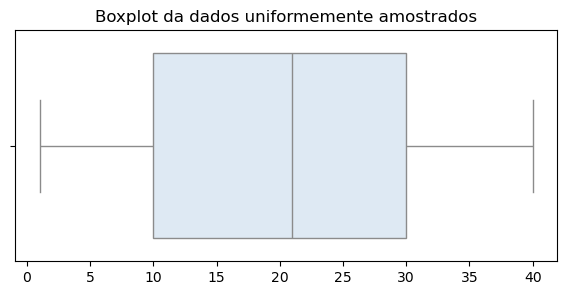

In [6]:
plt.figure(figsize=(7,3))
sns.set_palette("Blues")
ax = sns.boxplot(x=nums)
ret = plt.title("Boxplot da dados uniformemente amostrados");

In [7]:
N

1000000

In [8]:
# Quartis

n4 = int(N/4)

mini = int( nums[0] )
q1   = int( nums[n4] )
mediana = int( nums[n4*2] )
q3   = int( nums[n4*3] )
maxi = int( nums[-1] )

f"mínimo {mini}, Q1 {q1}, mediana {mediana}, Q3 {q3}, máximo {maxi}"

'mínimo 36, Q1 3, mediana 27, Q3 4, máximo 30'

In [9]:
mini, q1, mediana, q2, maxi = np.quantile(nums, [0, 0.25, 0.5, 0.75, 1])
f"mínimo {mini}, Q1 {q1}, mediana {mediana}, Q3 {q3}, máximo {maxi}"

'mínimo 1.0, Q1 10.0, mediana 21.0, Q3 4, máximo 40.0'

### Quero 2 gráficos com eixo x compartilhado ('alinhados')

um ao lado do outro  
seria 2 linhas e 1 coluna  

plt.subplots(1, 2 ....sharex=True)


In [10]:
import seaborn as sns
import matplotlib.pyplot as plt # matplotlib e seu alias plt

Text(0.5, 1.0, 'Boxplot')

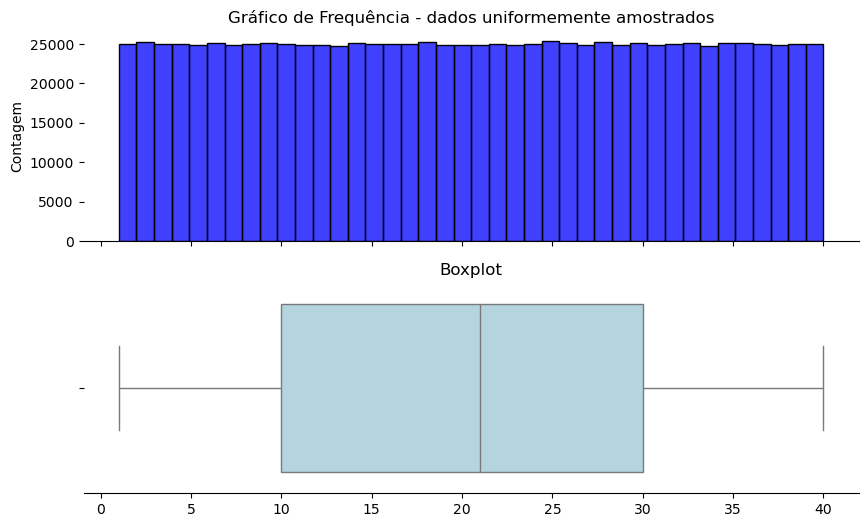

In [11]:
# Set up the matplotlib figure
f, axes = plt.subplots(2, 1, figsize=(10,6), sharex=True)
sns.despine(left=True)

ax = sns.histplot(nums, bins=divs, kde=False, color='blue', ax=axes[0])
ax.set_ylabel("Contagem")
ax.set_title("Gráfico de Frequência - dados uniformemente amostrados")

ax = sns.boxplot(x=nums, ax=axes[1], color='lightblue')
ax.set_title("Boxplot")

# plt.tight_layout()

## Distribuição binomial
  - binomial: sim / não, cara / coroa, mutou / não mutou
        
![binomial distribution](../figure/binomial_distribution.jpg)        

### Moedas justas (não viciadas) - p=0.5

acertar 5 caras é muito difícil

0.5 * 0.5 * 0.5 * 0.5 * 0.5

0.5 ** 5

In [12]:
0.5 * 0.5 * 0.5 * 0.5 * 0.5

0.03125

In [13]:
np.round( (0.5 ** 5)*100, 2)

np.float64(3.12)

In [14]:
f"A probabilidade de se obter CCCCC = {(0.5 ** 5)*100:.3f}%"

'A probabilidade de se obter CCCCC = 3.125%'

### Se você jogar 2x segundas e acertar 5 Caras

In [15]:
# muito raro: ~  1 / 1000
p_raro = 0.5 ** 5

f"A probabilidade de se obter CCCCC 2 vezes seguidas = {p_raro*p_raro*100:.3f}%"

'A probabilidade de se obter CCCCC 2 vezes seguidas = 0.098%'

## Porque jogar 2x seguidas e acertar 5 Caras = p_raro*p_raro?

### Eventos independentes

  - Eventos independentes se multiplica as probabilidades

**Exemplo**

Probabilidade de chover = p_cho = 0.8 
Probabilidade de eu ir bem no curso de estatística = p_est = .7

  - Logo,

A probabilidade de chover e eu  ir bem no curso de estatística:

p_cho * p_est = 0.56

Ou seja,

A probabilidade de chover e eu  ir bem no curso de estatística SIMULTANEAMENTE é de 56%, pois são eventos independentes


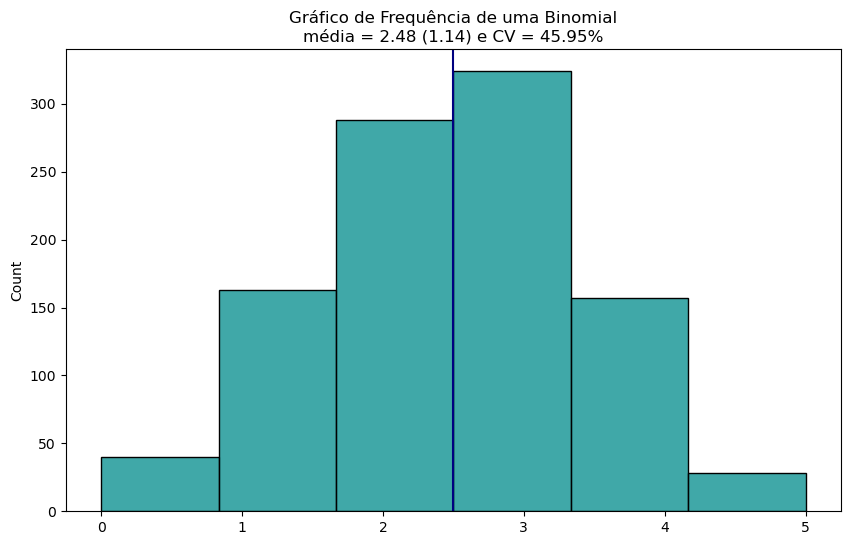

In [16]:
n = 5    # moedas = [5C, 4C, .... 0C]
p = 0.5  # moedas não são viciadas p(cara) = p(coroa) = .5
N = 1000
jogo = np.random.binomial(n, p, N)

mu  = np.mean(jogo)
SSD = np.std(jogo)
# coeficiente de variação = SD/media
VC = SSD/mu

fig = plt.figure(figsize=(10,6))
ax = sns.histplot(jogo, bins=n+1, kde=False, stat="count", color="darkcyan")

ax.axvline(n*p, color='navy')
ax.set_title("Gráfico de Frequência de uma Binomial\nmédia = %.2f (%.2f) e CV = %.2f%%"%(mu, SSD, VC*100));

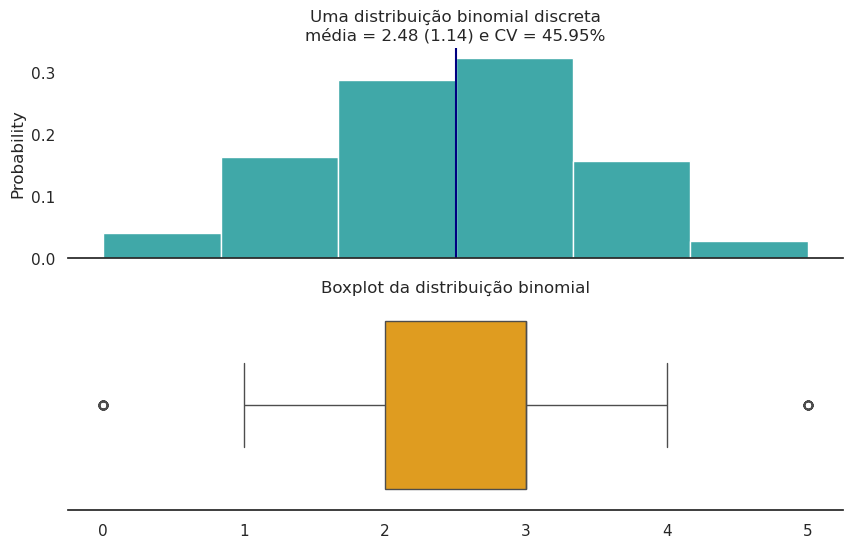

In [17]:
sns.set(style="white", palette="muted", color_codes=True)

# Set up the matplotlib figure
f, axes = plt.subplots(2, 1, figsize=(10,6), sharex=True)
sns.despine(left=True)


ax = sns.histplot(jogo, bins=n+1, kde=False, stat="probability", color="darkcyan", ax=axes[0])
ax.axvline(n*p, color='navy')
ax.set_title("Uma distribuição binomial discreta\nmédia = %.2f (%.2f) e CV = %.2f%%"%(mu, SSD, VC*100));

ax = sns.boxplot(x=jogo, color='orange', ax=axes[1])
ax.set_title("Boxplot da distribuição binomial");